<h1 align='center' style="color: blue;">Assignment #4</h1>

<b>Question #1</b>: Use the <b>Health_care.csv</b> file. This file consists of a labeled dataset of 10,000 users in Twitter. Descriptions are captured from profile of users and labeled are assigned to them based on the profession (1= healthcare professional, 0= Non-healthcare professional)
<ol>
    <li>Use a representative image to form a wordcloud using the healthcare professional users' descriptions</li>
    <li>Create the document term frequency matrix (X) using CountVectorizer</li>
    <li>Use multinomial NB to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use Random Forest to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use Stochastic Gradient Descent to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use logistic regression to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 10-fold cross validation to test the performace of your model</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use LDA to find 5 topics in description of health professional users</li>
    <li>Use the 5 detected topics in the last step and apply the logistic regression to develope a predictive model. Check the performance the model using the accuracy metric.
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use word-embedding method to develope a prredictive model. Use logistic regression in your work.
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
        
<ol>

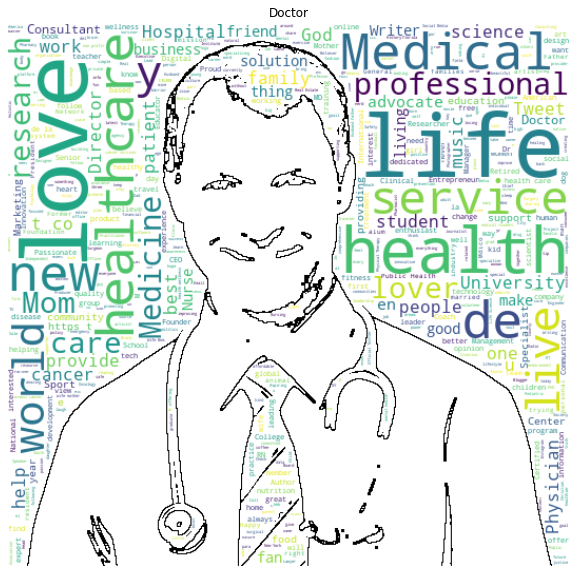

In [3]:
# Write your answer here (part1)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import STOPWORDS
from sklearn.naive_bayes import MultinomialNB

hc = pd.read_csv("Health_care.csv")
hm = np.array(Image.open("doctor.png"))
def transform_format(val):
    if val >=150:
        return 255
    else:
        return val
hcm = hm[:,:,0]

thcm = np.ndarray((hcm.shape[0],hcm.shape[1]), np.int32)

for j in range(len(hcm)):
    thcm[j] = list(map(transform_format, hcm[j]))

desc = hc.description[:]


text = " ".join(k for k in desc)
wc = WordCloud(background_color="white", max_words=1000, 
               mask=thcm, contour_width=1, 
               contour_color='black')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.title("Doctor")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [4]:
# Write your answer here (part2)

v = CountVectorizer(stop_words="english").fit(desc)
X = v.transform(desc)
pd.DataFrame(X.toarray(), columns=v.get_feature_names())

,00,000,0000,0020,00905348912222,0093700009845,00rdws2vnk,01,01000546639,0103,...,zrich,zrm,zs,zulaikha,zuma,zur,zurich,zutler,zwqhszyf6s,zzmbjlihmz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Write your answer here (part3)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = hc.hc_related[:]
MNB = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
MNB.fit(X_train, y_train)
y_test_hat = MNB.predict(X_test)
Accuracy=round(accuracy_score(y_test,y_test_hat) * 100,2)
print("Accuracy for Multinomial NB: ",Accuracy)

Accuracy for Multinomial NB:  86.23


In [6]:
# Write your answer here (part4)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train,y_train)
y_test_hat  = RF.predict(X_test)
Accuracy=round(accuracy_score(y_test,y_test_hat) * 100,2)
print("Accuracy for Random Forest: ",Accuracy)

Accuracy for Random Forest:  91.4


In [7]:
# Write your answer here (part5)

from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(X_train, y_train)
y_test_hat = SGDC.predict(X_test)
Accuracy=round(accuracy_score(y_test,y_test_hat) * 100,2)
print("Accuracy for SGDC classifier is: ",Accuracy)

Accuracy for SGDC classifier is:  90.77


In [8]:
# Write your answer here (part6)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
LR = LogisticRegression(solver='liblinear')
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
la= cross_val_score(LR, X, y, cv=cv, scoring='accuracy')
print("Accuracy for SGDClassifier: ",la)
mean_acc=round(np.mean(la)*100,2)
print("Mean Accuracy Score for Log Reg: ",mean_acc)

Accuracy for SGDClassifier:  [0.891 0.916 0.924 0.9   0.903 0.899 0.898 0.909 0.911 0.904]
Mean Accuracy Score for Log Reg:  90.55


In [9]:
# Write your answer here (part7)
from sklearn.decomposition import LatentDirichletAllocation as lda
v = CountVectorizer(stop_words="english", max_df=.60).fit(desc)
X = v.transform(desc)
t = lda(n_components=5, learning_method="batch",max_iter=25, random_state=0) 
desc_topics = t.fit_transform(X)
desc_topics.shape
n = 5

feature_names = np.array(v.get_feature_names())

topics = dict()

for idx, component in enumerate(t.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

{0: ['life', 'ceo', 'https', 'founder', 'designer'],
 1: ['health', 'medical', 'care', 'healthcare', 'medicine'],
 2: ['la', 'en', 'el', 'que', 'mi'],
 3: ['love', 'life', 'lover', 'music', 'god'],
 4: ['wife', 'mother', 'mom', 'new', 'life']}

In [10]:
# Write your answer here (part8)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

LR = LogisticRegression(max_iter=300)
X_train, X_test, y_train, y_test = train_test_split(document_topics, y,test_size=0.3,random_state=0,stratify = y)
LR.fit(X_train, y_train)
y_test_hat = LR.predict(X_test)

acc=round(accuracy_score(y_test,y_test_hat) * 100,2)

print("The accuracy score is",acc)

The accuracy score is 70.87


In [14]:
# Write your answer here (part9)
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

text, y = hc.description, hc.hc_related


nltk.download('stopwords')

embeddings = []
for desc in tqdm(text):
    
    base_embedding = np.zeros((50,))
    word_count = 0
    for token in word_tokenize(desc):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)
    
X = np.array(embeddings)
X.shape
edited=np.nan_to_num(X)

y=hc.hc_related
X_train, X_test, y_train, y_test = train_test_split(edited, y,test_size=0.3,random_state=0)
LR = LogisticRegression(max_iter=300)
LR.fit(X_train, y_train)
y_test_hat = LR.predict(X_test)
print("Accuracy of the model with word embedding is:",round(accuracy_score(y_test,y_test_hat) * 100,2))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]<ipython-input-14-65d933d6dfc7>:26: RuntimeWarning: invalid value encountered in true_divide
  base_embedding = base_embedding/word_count
100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 330.55it/s]

Accuracy of the model with word embedding is: 61.93


<b>Question #2</b>: Use the <b>game_of_thrones.csv</b> file. The file contains network data for character relationships within George R. R. Martin's A Storm of Swords, the third novel in his series A Song of Ice and Fire (also known as the HBO television adaptation Game of Thrones). This data was originally compiled by A. Beveridge and J. Shan, "Network of Thrones," Math Horizons Magazine , Vol. 23, No. 4 (2016), pp. 18-22.
<ol>
    <li>Visualize the network using Force Atalas 2 layout (Optional)</li>
    <li>What is the degree distribution?(plot it)</li>
    <li>What is the average network clustering value?</li>
    <li>Which character has the highest betweenness centrality?</li>
    <li>Which character has the highest eigenvector centrality?</li>
    <li>Which character has the highest pagerank value?</li>
    <li>Apply community detection using louvain algorithm and visualize the result (resolution=1)</li>
<ol>

100%|██████████| 100/100 [00:00<00:00, 564.32it/s]


BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


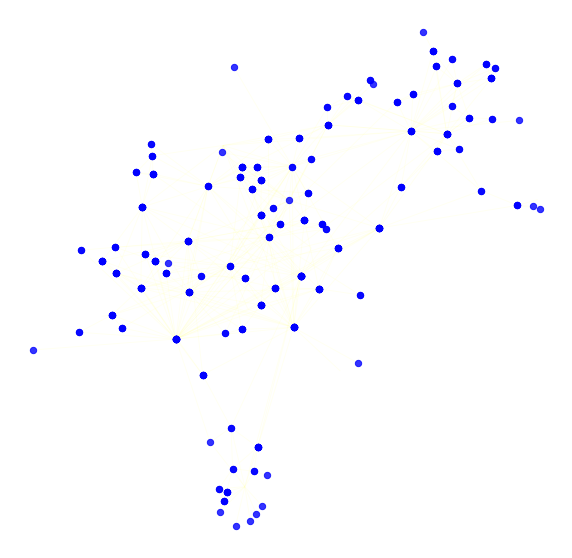

In [3]:
# Write your answer here (part1)
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import STOPWORDS
got = pd.read_csv("game_of_thrones.csv")
got_graph = nx.from_pandas_edgelist(got, 'Source', 'Target', create_using=nx.Graph())



fa2 = ForceAtlas2(                        
                        outboundAttractionDistribution=True,  
                        linLogMode=False,  
                        adjustSizes=False,  
                        edgeWeightInfluence=1.0,                      
                        jitterTolerance=1.0,  
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,                      
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=2.0,                       
                        verbose=True )

pos = fa2.forceatlas2_networkx_layout(got_graph, pos=None, iterations=100)


fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(got_graph, pos, 
                       nodelist=list(got.Target[:]), node_size=40, 
                       with_labels=True, 
                       node_color="blue", alpha=0.8)

nx.draw_networkx_edges(got_graph, pos, edge_color="yellow", alpha=0.05)
plt.axis("off");

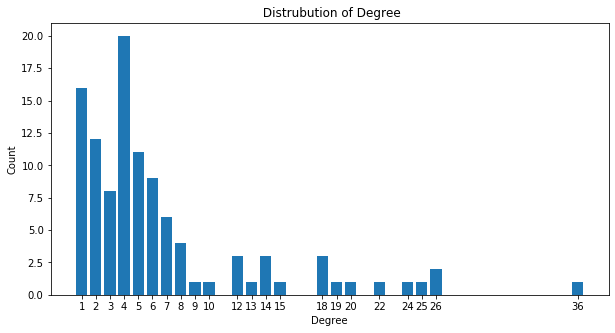

In [4]:
# Write your answer here (part2)
import collections

seq_d = sorted([i for j, i in got_graph.degree()], reverse=True) 
count_d = collections.Counter(seq_d)
d, c = zip(*count_d.items())
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(d, c)
plt.title(" Distrubution of Degree")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([j for j in d])
ax.set_xticklabels(d);

In [5]:
# Write your answer here (part3)
print("The average clustering value is :",(nx.average_clustering(got_graph)))

The average clustering value is : 0.551443151559996


In [6]:
# Write your answer here (part4)
betweenness_centrality = nx.betweenness_centrality(got_graph)
Name = max(betweenness_centrality, key=betweenness_centrality.get)
Values = max(betweenness_centrality.values())
print("character with max Betweeness centrality is",Name)
print("The value of Max Betweeness centrality is ",Values)

character with max Betweeness centrality is Jon
The value of Max Betweeness centrality is  0.22996466368473173


In [7]:
# Write your answer here (part5)
eigenvector_centrality = nx.eigenvector_centrality(got_graph)
Name = max(eigenvector_centrality, key=eigenvector_centrality.get)
Values = max(eigenvector_centrality.values())
print("character with max Betweeness centrality is", Name)
print("The value of Max Betweeness centrality is ", Values)

character with max Betweeness centrality is Tyrion
The value of Max Betweeness centrality is  0.33663766254996313


In [13]:
# Write your answer here (part6)
pagerank = nx.pagerank(got_graph)
pg_name = max(pagerank, key = pagerank.get)
pg_value = max(pagerank.values())
print("{} is the character with the maximum pagerank value i.e of {}".format(pg_name,pg_value))
print("")
print(pagerank);

Tyrion is the character with the maximum pagerank value i.e of 0.04287783318840101

{'Aemon': 0.007329510429789074, 'Grenn': 0.00651321043118709, 'Samwell': 0.02162146694590946, 'Aerys': 0.005476955022635659, 'Jaime': 0.02872381267506383, 'Robert': 0.022293325338231373, 'Tyrion': 0.04287783318840101, 'Tywin': 0.025695200615114374, 'Alliser': 0.0051626457600577845, 'Mance': 0.01809750401117913, 'Amory': 0.0026803852809945848, 'Oberyn': 0.010529582431459182, 'Arya': 0.022046457943495388, 'Anguy': 0.0035526822442074873, 'Beric': 0.008220973123047579, 'Bran': 0.01886751035864019, 'Brynden': 0.010230156646428205, 'Cersei': 0.022282801141172807, 'Gendry': 0.005679570715459109, 'Gregor': 0.013931077298937476, 'Joffrey': 0.02034889765102063, 'Jon': 0.035830628137273716, 'Rickon': 0.007771425242507898, 'Roose': 0.005454679494197118, 'Sandor': 0.014887811948854301, 'Thoros': 0.006785663049179372, 'Balon': 0.007585669218835428, 'Loras': 0.011032619509453341, 'Belwas': 0.009066303116801597, 'Barri

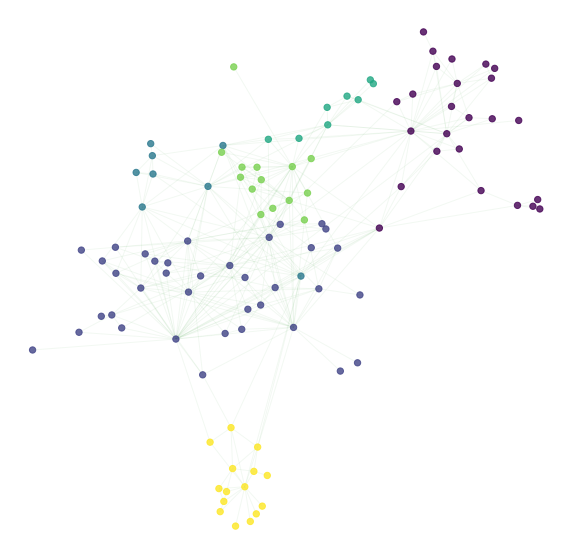

In [14]:
# Write your answer here (part7)

p = best_partition(got_graph, resolution=1)
nodes = [i for i, v in p.items()]
cluster = [v for k, v in p.items()]


fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(got_graph, pos,nodelist=nodes, node_size=40,with_labels=True,node_color=cluster, alpha=0.8)
nx.draw_networkx_edges(got_graph, pos, edge_color="green", alpha=0.05)
plt.axis('off');

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Create a zip-folder and put your file in it.</li>
        <li>Upload the zip-folder into Canvas (Assignment #4)</li>
        <li>All the assignments should be submitted by <b> Wednesday Dec 9 at 11:59 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
</p> 